#### Case Study: Exploratory Data Analysis (EDA) of Online Retail Dataset

##### In this project, we will conduct an exploratory data analysis (EDA) on a transactional dataset from an online retail store. The dataset contains detailed information about customer purchases, including product details, quantities, prices, and timestamps, spanning transactions from 2010 to 2011. The goal of this analysis is to explore and extract insights into the store’s sales trends, customer behaviors, and popular products, which will help optimize the store's operations and improve customer satisfaction.

##### By performing EDA, we aim to identify key patterns, detect outliers, and find correlations within the dataset. These insights will drive data-informed decisions and help in formulating strategies that can enhance the online store's overall performance in the competitive retail market. Through visualizations and statistical analysis, we will uncover important trends such as peak sales months, best-selling products, and the store’s most valuable customers.

##### The analysis will involve tasks such as:
    - Analyzing sales trends over time (e.g., busiest sales months and days of the week)
    - Identifying top-selling products and countries with the highest sales
    - Detecting any anomalies or outliers in the dataset
    - Generating key recommendations based on the findings to improve business performance.


##### The insights gathered from this analysis will be critical in helping the store make data-driven decisions and enhance its overall customer experience.

In [6]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('done')

done


In [7]:
#read the data
path = 'data/Online Retail.xlsx'
retail =  pd.read_excel(path, sheet_name=0)

In [8]:
retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
retail.shape

(541909, 8)

In [10]:
retail.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [11]:
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [12]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [13]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [15]:
#CustomerID     135080
#Description      1454

retail['CustomerID'].describe()

count    406829.000000
mean      15287.690570
std        1713.600303
min       12346.000000
25%       13953.000000
50%       15152.000000
75%       16791.000000
max       18287.000000
Name: CustomerID, dtype: float64

In [16]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [17]:
#create new columns
#total spend
#month
#weekday
retail['TotalSpend'] = retail['Quantity'] * retail['UnitPrice']
retail['Month'] =  retail['InvoiceDate'].dt.month_name()
retail['Month_id'] = retail['InvoiceDate'].dt.month
retail['WeekDay'] = retail['InvoiceDate'].dt.day_name()
retail['Year'] = retail['InvoiceDate'].dt.year

In [18]:
retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend,Month,Month_id,WeekDay,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December,12,Wednesday,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,12,Wednesday,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December,12,Wednesday,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,12,Wednesday,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,12,Wednesday,2010


In [19]:
#we don't need Description column
retail = retail.drop(columns=['Description'])

In [20]:
retail.head(5)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend,Month,Month_id,WeekDay,Year
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December,12,Wednesday,2010
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,12,Wednesday,2010
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December,12,Wednesday,2010
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,12,Wednesday,2010
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,12,Wednesday,2010


In [21]:
#stock code
retail['StockCode'].describe()

count     541909
unique      4070
top       85123A
freq        2313
Name: StockCode, dtype: object

In [22]:
#there are 4070 items in our store
#lets see what is the bestseller


In [23]:
#best seller by volume

In [24]:
best_seller_q = retail.groupby('StockCode')['Quantity'].sum()

In [25]:
bs_q = best_seller_q.sort_values(ascending=False).head(10).reset_index()

In [26]:
bs_q

,StockCode,Quantity
0,22197,56450
1,84077,53847
2,85099B,47363
3,85123A,38830
4,84879,36221
5,21212,36039
6,23084,30646
7,22492,26437
8,22616,26315
9,21977,24753


In [27]:
#best seller by revenue

In [28]:
best_seller_r = retail.groupby('StockCode')['TotalSpend'].sum()

In [29]:
bs_r = best_seller_r.sort_values(ascending=False).head(10).reset_index().rename(columns={'TotalSpend':'Revenue Generated'})

In [30]:
bs_r

,StockCode,Revenue Generated
0,DOT,206245.48
1,22423,164762.19
2,47566,98302.98
3,85123A,97894.50
4,85099B,92356.03
5,23084,66756.59
6,POST,66230.64
7,22086,63791.94
8,84879,58959.73
9,79321,53768.06


In [31]:
#lets join both the above data sets 

In [32]:
bs_merge =  pd.merge(bs_q, bs_r, on='StockCode')

In [33]:
bs_merge.head()

,StockCode,Quantity,Revenue Generated
0,85099B,47363,92356.03
1,85123A,38830,97894.50
2,84879,36221,58959.73
3,23084,30646,66756.59


In [34]:
# Most valuble customers

In [35]:
customer_spend = retail.groupby('CustomerID')['TotalSpend'].sum()

In [36]:
customer_spend.sort_values(ascending=False).head(10).reset_index()

,CustomerID,TotalSpend
0,14646.0,279489.02
1,18102.0,256438.49
2,17450.0,187482.17
3,14911.0,132572.62
4,12415.0,123725.45
5,14156.0,113384.14
6,17511.0,88125.38
7,16684.0,65892.08
8,13694.0,62653.10
9,15311.0,59419.34


In [37]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country', 'TotalSpend', 'Month', 'Month_id', 'WeekDay',
       'Year'],
      dtype='object')

In [38]:
#InvoiceDate
#monthly sales report

##### Key Metrics for Monthly Sales Report:
    - Total Revenue: The sum of Quantity * UnitPrice for each month.
    - Total Quantity Sold: The total number of units sold in each month.
    - Average Unit Price: The average price of products sold each month.
    - Number of Transactions: Count of unique invoices in each month.

In [40]:
retail['Year'].value_counts()

Year
2011    499428
2010     42481
Name: count, dtype: int64

In [41]:
#let's consider 2011 data only for monthly sales report

In [42]:
retail_2011 = retail[retail['Year'] == 2011]

monthly_sales_report = retail_2011.groupby('Month_id').agg(
    total_revenue=('TotalSpend', 'sum'),
    total_quantity_sold=('Quantity', 'sum'),
    average_unit_price=('UnitPrice', 'mean'),
    num_transactions=('InvoiceNo', 'nunique')
).reset_index()

In [43]:
monthly_sales_report.sort_values(by='total_revenue', ascending=False)

,Month_id,total_revenue,total_quantity_sold,average_unit_price,num_transactions
10,11,1461756.250,740286,3.861952,3462
9,10,1070704.670,570532,4.336935,2637
8,9,1019687.622,549817,3.966774,2327
4,5,723333.510,380391,5.149486,2162
5,6,691123.120,341623,5.443330,2012
2,3,683267.080,351872,4.666554,1983
7,8,682680.510,406199,4.262149,1737
6,7,681300.111,391116,4.350088,1927
0,1,560000.260,308966,4.915151,1476
1,2,498062.650,277989,4.599876,1393


In [44]:
import calendar
month_names = list(calendar.month_name)[1:]

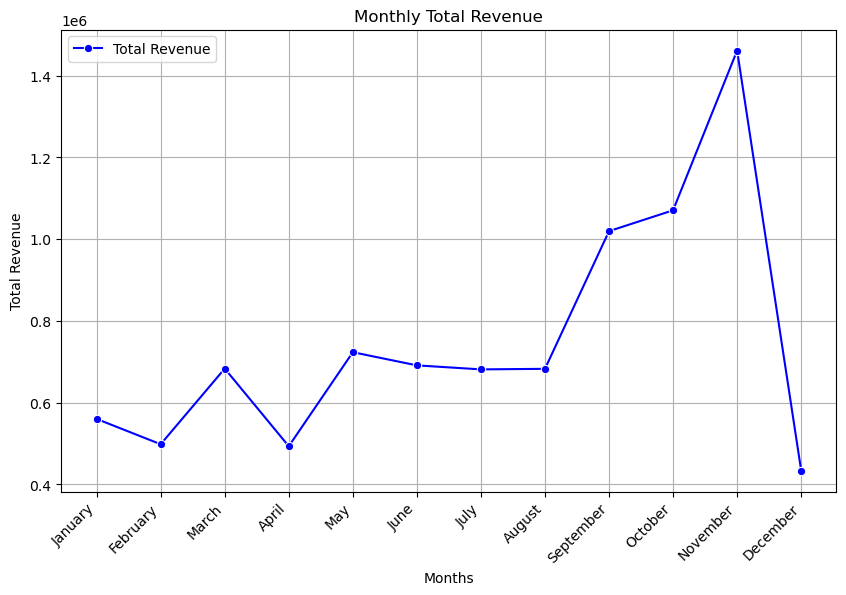

In [96]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the total revenue trend
sns.lineplot(data=monthly_sales_report, x='Month_id', y='total_revenue', marker='o', label='Total Revenue', color='b')

# Customize the plot
plt.title('Monthly Total Revenue')
plt.xlabel('Months')
plt.ylabel('Total Revenue')
plt.xticks(monthly_sales_report['Month_id'], month_names, rotation=45, horizontalalignment='right')
plt.grid(True)
plt.legend()

plt.savefig('sales_plot.png', dpi=400, bbox_inches='tight')
# Display the plot
plt.show()


In [46]:
retail['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [47]:
country_sales = retail.groupby('Country')['Quantity'].sum().sort_values(ascending = False).head(10)

In [48]:
country_sales

Country
United Kingdom    4263829
Netherlands        200128
EIRE               142637
Germany            117448
France             110480
Australia           83653
Sweden              35637
Switzerland         30325
Spain               26824
Japan               25218
Name: Quantity, dtype: int64

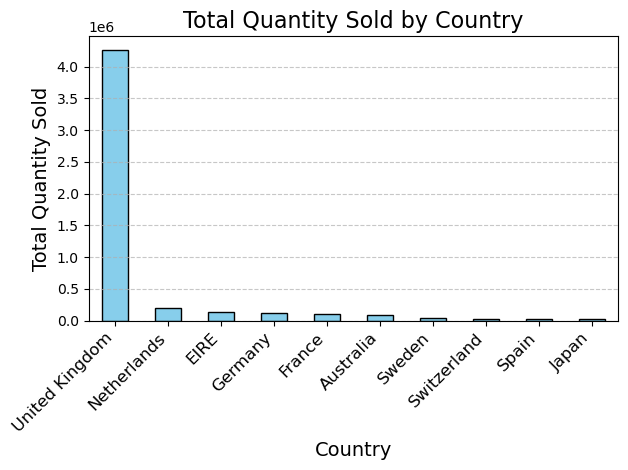

In [49]:
#plt.figure(figsize=(10, 6))
country_sales.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Total Quantity Sold by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


##### Conclusion

###### United Kingdom has hightest sales, The sales are high in the month of November and lowest in the month of december.